### Importing libraries

In [1]:
#@title Importing libraries
import sys, os
import numpy as np
import pandas as pd

import pickle as pkl

import matplotlib.pyplot as plt

import seaborn as sns

### Set whether to use manuscript results or own trined models

In [2]:
#FOLDER LOCATIONS
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-2])
folder_path = f'{ROOT_PATH}/Plot_results/VanHateren_Gamma-Laplace/'

use_manuscript_training = True

if use_manuscript_training:
    data_path = folder_path + f'data/manuscript/'
    figures_path = folder_path + f'figures/manuscript/'
else:
    data_path = folder_path + f'data/personal/'
    figures_path = folder_path + f'figures/personal/'

### Setting colors, fonts and dpi

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'DejaVu Sans'

In [4]:
#Defining color palettes

cmap_bright = sns.color_palette(['#4477AA', '#66CCEE', '#228833', '#CCBB44','#EE6677','#BBBBBB'],6)
cmap_pale = sns.color_palette(['#BBCCEE', '#CCEEFF', '#CCDDAA', '#EEEEBB','#FFCCCC','#DDDDDD'],6)
cmap_dark = sns.color_palette(['#222255', '#225555', '#225522', '#666633','#663333','#555555'],6)

cmap_bright_vae_eavae = sns.color_palette(['#4477AA','#EE6677'],2)
cmap_pale_vae_eavae = sns.color_palette(['#BBCCEE','#FFCCCC'],2)
cmap_dark_vae_eavae = sns.color_palette(['#222255','#663333'],2)

color_vae = cmap_bright[0]
color_eavae = cmap_bright[4]

### Import previously saved data (if plotting own model, run before this, the eval_vanHateren_Gamma-Laplace.ipynb Notebook)

In [7]:
#Importing data
binned_signal_mean_test_vae = np.load(data_path + 'binned_signal_mean_test_vae.npy')
binned_signal_var_test_vae = np.load(data_path + 'binned_signal_var_test_vae.npy')
binned_noise_var_test_vae = np.load(data_path + 'binned_noise_var_test_vae.npy')
binned_signal_mean_error_test_vae = np.load(data_path + 'binned_signal_mean_error_test_vae.npy')
binned_signal_var_error_test_vae = np.load(data_path + 'binned_signal_var_error_test_vae.npy')
binned_noise_var_error_test_vae = np.load(data_path + 'binned_noise_var_error_test_vae.npy')
contrast_rounds_test_vae = np.load(data_path + 'contrast_rounds_test_vae.npy')

binned_signal_mean_test_eavae = np.load(data_path + 'binned_signal_mean_test_eavae.npy')
binned_signal_var_test_eavae = np.load(data_path + 'binned_signal_var_test_eavae.npy')
binned_noise_var_test_eavae = np.load(data_path + 'binned_noise_var_test_eavae.npy')
binned_signal_mean_error_test_eavae = np.load(data_path + 'binned_signal_mean_error_test_eavae.npy')
binned_signal_var_error_test_eavae = np.load(data_path + 'binned_signal_var_error_test_eavae.npy')
binned_noise_var_error_test_eavae = np.load(data_path + 'binned_noise_var_error_test_eavae.npy')
contrast_rounds_test_eavae = np.load(data_path + 'contrast_rounds_test_eavae.npy')

k_param = 2
test_zmu_eavae = np.load(data_path + 'nat_test_zmu_eavae.npy')
test_zstd_eavae = np.sqrt(np.load(data_path + 'nat_test_zvar_eavae.npy'))
test_mean_and_std = np.load(data_path + 'test_mean_and_std.npy')
nat_contrast = test_mean_and_std[:,1]

F_test_eavae=np.load(data_path +'F_test_eavae.npy')
informative_idxs_eavae=np.load(data_path +'informative_idxs_eavae.npy')
decoration_idxs_eavae=np.load(data_path +'decoration_idxs_eavae.npy')
F_test_vae=np.load(data_path +'F_test_vae.npy')
informative_idxs_vae=np.load(data_path +'informative_idxs_vae.npy')
decoration_idxs_vae=np.load(data_path +'decoration_idxs_vae.npy')

val_mean_rec_sqr_diff_vae = np.load(data_path + 'val_mean_rec_sqr_diff_vae.npy')
val_mean_rec_sqr_diff_eavae = np.load(data_path + 'val_mean_rec_sqr_diff_eavae.npy')

nat_train_pixs_std = np.load(data_path + 'nat_train_pixs_std.npy')
noise_level = np.sqrt(0.015/2)*(6*nat_train_pixs_std)

with open(data_path +'x_ori.pkl', 'rb') as f:
    x_ori = pkl.load(f)
with open(data_path +'x_vae.pkl', 'rb') as f:
    x_vae = pkl.load(f)
with open(data_path +'x_eavae.pkl', 'rb') as f:
    x_eavae = pkl.load(f)
 
with open(data_path +'num_x_ori.pkl', 'rb') as f:
    num_x_ori = pkl.load(f)
with open(data_path +'num_x_vae.pkl', 'rb') as f:
    num_x_vae = pkl.load(f)
with open(data_path +'num_x_eavae.pkl', 'rb') as f:
    num_x_eavae = pkl.load(f)
with open(data_path +'med_x_ori.pkl', 'rb') as f:
    med_x_ori = pkl.load(f)
with open(data_path +'med_x_vae.pkl', 'rb') as f:
    med_x_vae = pkl.load(f)
with open(data_path +'med_x_eavae.pkl', 'rb') as f:
    med_x_eavae = pkl.load(f)
with open(data_path +'fash_x_ori.pkl', 'rb') as f:
    fash_x_ori = pkl.load(f)
with open(data_path +'fash_x_vae.pkl', 'rb') as f:
    fash_x_vae = pkl.load(f)
with open(data_path +'fash_x_eavae.pkl', 'rb') as f:
    fash_x_eavae = pkl.load(f)
with open(data_path +'shuff_x_ori.pkl', 'rb') as f:
    shuff_x_ori = pkl.load(f)
with open(data_path +'shuff_x_vae.pkl', 'rb') as f:
    shuff_x_vae = pkl.load(f)
with open(data_path +'shuff_x_eavae.pkl', 'rb') as f:
    shuff_x_eavae = pkl.load(f)


uncertainty_df = pd.read_pickle(data_path + 'uncertainty_df')
zmu_eavae_df = pd.read_pickle(data_path + 'zmu_eavae_df')


"    \nwith open(data_path +'num_x_ori.pkl', 'rb') as f:\n    num_x_ori = pkl.load(f)\nwith open(data_path +'num_x_vae.pkl', 'rb') as f:\n    num_x_vae = pkl.load(f)\nwith open(data_path +'num_x_eavae.pkl', 'rb') as f:\n    num_x_eavae = pkl.load(f)\nwith open(data_path +'med_x_ori.pkl', 'rb') as f:\n    med_x_ori = pkl.load(f)\nwith open(data_path +'med_x_vae.pkl', 'rb') as f:\n    med_x_vae = pkl.load(f)\nwith open(data_path +'med_x_eavae.pkl', 'rb') as f:\n    med_x_eavae = pkl.load(f)\nwith open(data_path +'fash_x_ori.pkl', 'rb') as f:\n    fash_x_ori = pkl.load(f)\nwith open(data_path +'fash_x_vae.pkl', 'rb') as f:\n    fash_x_vae = pkl.load(f)\nwith open(data_path +'fash_x_eavae.pkl', 'rb') as f:\n    fash_x_eavae = pkl.load(f)\nwith open(data_path +'shuff_x_ori.pkl', 'rb') as f:\n    shuff_x_ori = pkl.load(f)\nwith open(data_path +'shuff_x_vae.pkl', 'rb') as f:\n    shuff_x_vae = pkl.load(f)\nwith open(data_path +'shuff_x_eavae.pkl', 'rb') as f:\n    shuff_x_eavae = pkl.load(f)\

### Natural images patch reconstructions

/tmp/ipykernel_21580/537144794.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


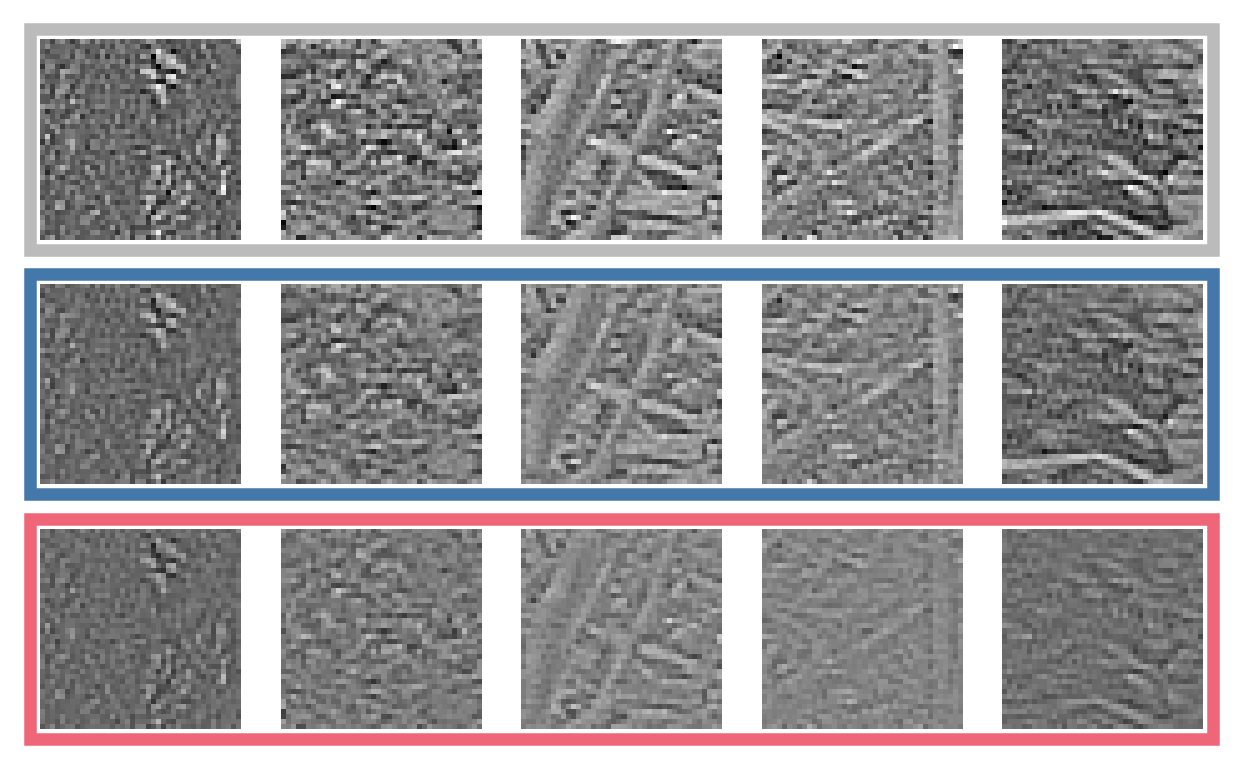

In [8]:
#natural images reconstructions
fig, ax = plt.subplots(3, 5, figsize=(5,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[5], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=236, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i,k in enumerate(range(6,11)):

    vminn = np.array([x_ori[k].min(),x_vae[k].min(),x_eavae[k].min()]).min()
    vmaxx = np.array([x_ori[k].max(),x_vae[k].max(),x_eavae[k].max()]).max()
    ax[0, i].imshow(x_ori[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_vae[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_eavae[k].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()
#plt.savefig(figures_path+"nat_recs.svg")

### Latent receptive fields (VAE & EA-VAE)

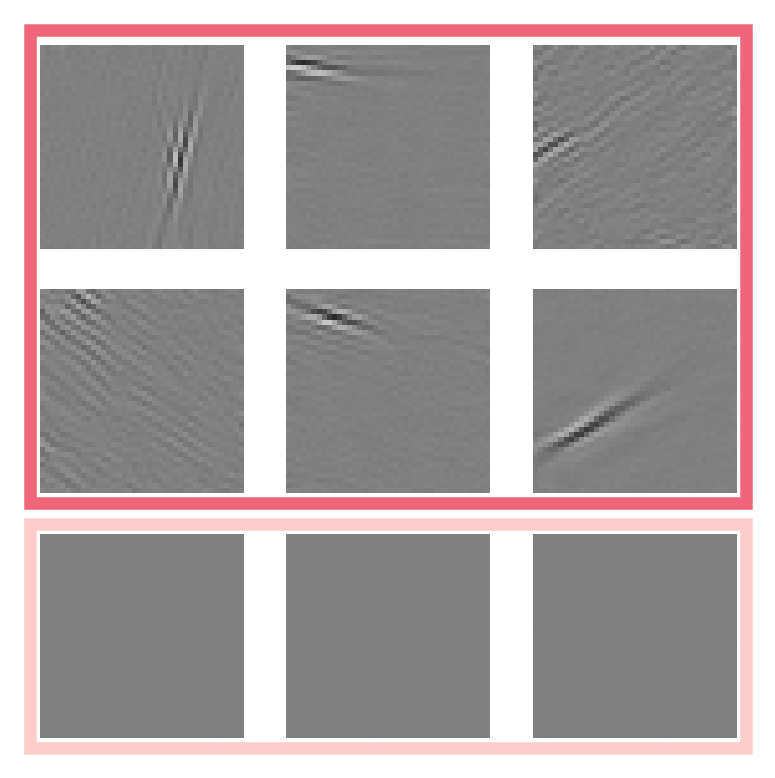

In [16]:
#EAVAE Latent receptive fields
model = 'gamma' 

projective_fields = F_test_eavae
impact_factor = val_mean_rec_sqr_diff_eavae

nrows,ncols= 3,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
rect_eavae_inf = plt.Rectangle((-2.5,-0.05), width=140.5, height=2.325,
                     transform=axs[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_eavae_dec = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=axs[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_pale[4], facecolor="none", linewidth=3)
axs[1,0].add_patch(rect_eavae_inf)
axs[2,0].add_patch(rect_eavae_dec)
for ind,ax in enumerate(axs.ravel()):
    if ind < 2*ncols:
        ind = np.random.randint(0,len(informative_idxs_eavae)-1)
        img = projective_fields[:,np.argsort(impact_factor)[-ind-1]]
    else:
        img = projective_fields[:,np.argsort(impact_factor)[ind-2*ncols]]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=projective_fields.min(),vmax = projective_fields.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])
#plt.savefig(figures_path+"eavae_fields.svg")

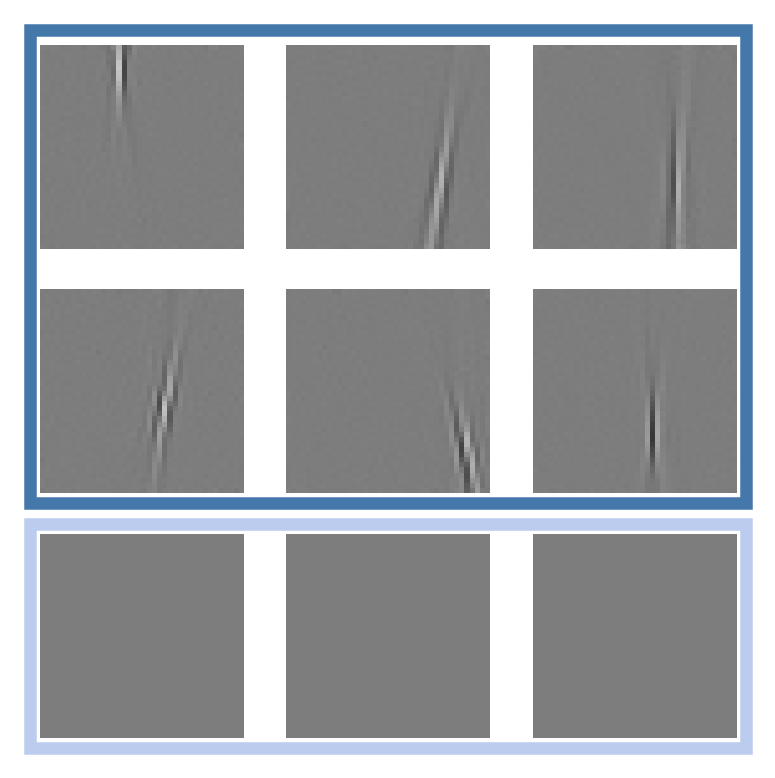

In [17]:
#VAE latent receptive fields
nrows,ncols= 3,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols,nrows),facecolor='white')
rect_vae_inf = plt.Rectangle((-2.5,-0.05), width=140.5, height=2.325,
                     transform=axs[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
rect_vae_dec = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=axs[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_pale[0], facecolor="none", linewidth=3)
axs[1,0].add_patch(rect_vae_inf)
axs[2,0].add_patch(rect_vae_dec)
for ind,ax in enumerate(axs.ravel()):
    if ind < 2*ncols:
        img = F_test_vae[:, np.argsort(val_mean_rec_sqr_diff_vae)[-ind-4]]
    else:
        img = F_test_vae[:,np.argsort(val_mean_rec_sqr_diff_vae)[ind-2*ncols]]
    ax.imshow(img.reshape(40,40), cmap="gray",vmin=F_test_vae.min(),vmax = F_test_vae.max())
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])
#plt.savefig(figures_path+"vae_fields.svg")

### Signal mean, signal variance and noise variance as function of contrast (VAE vs EA-VAE)

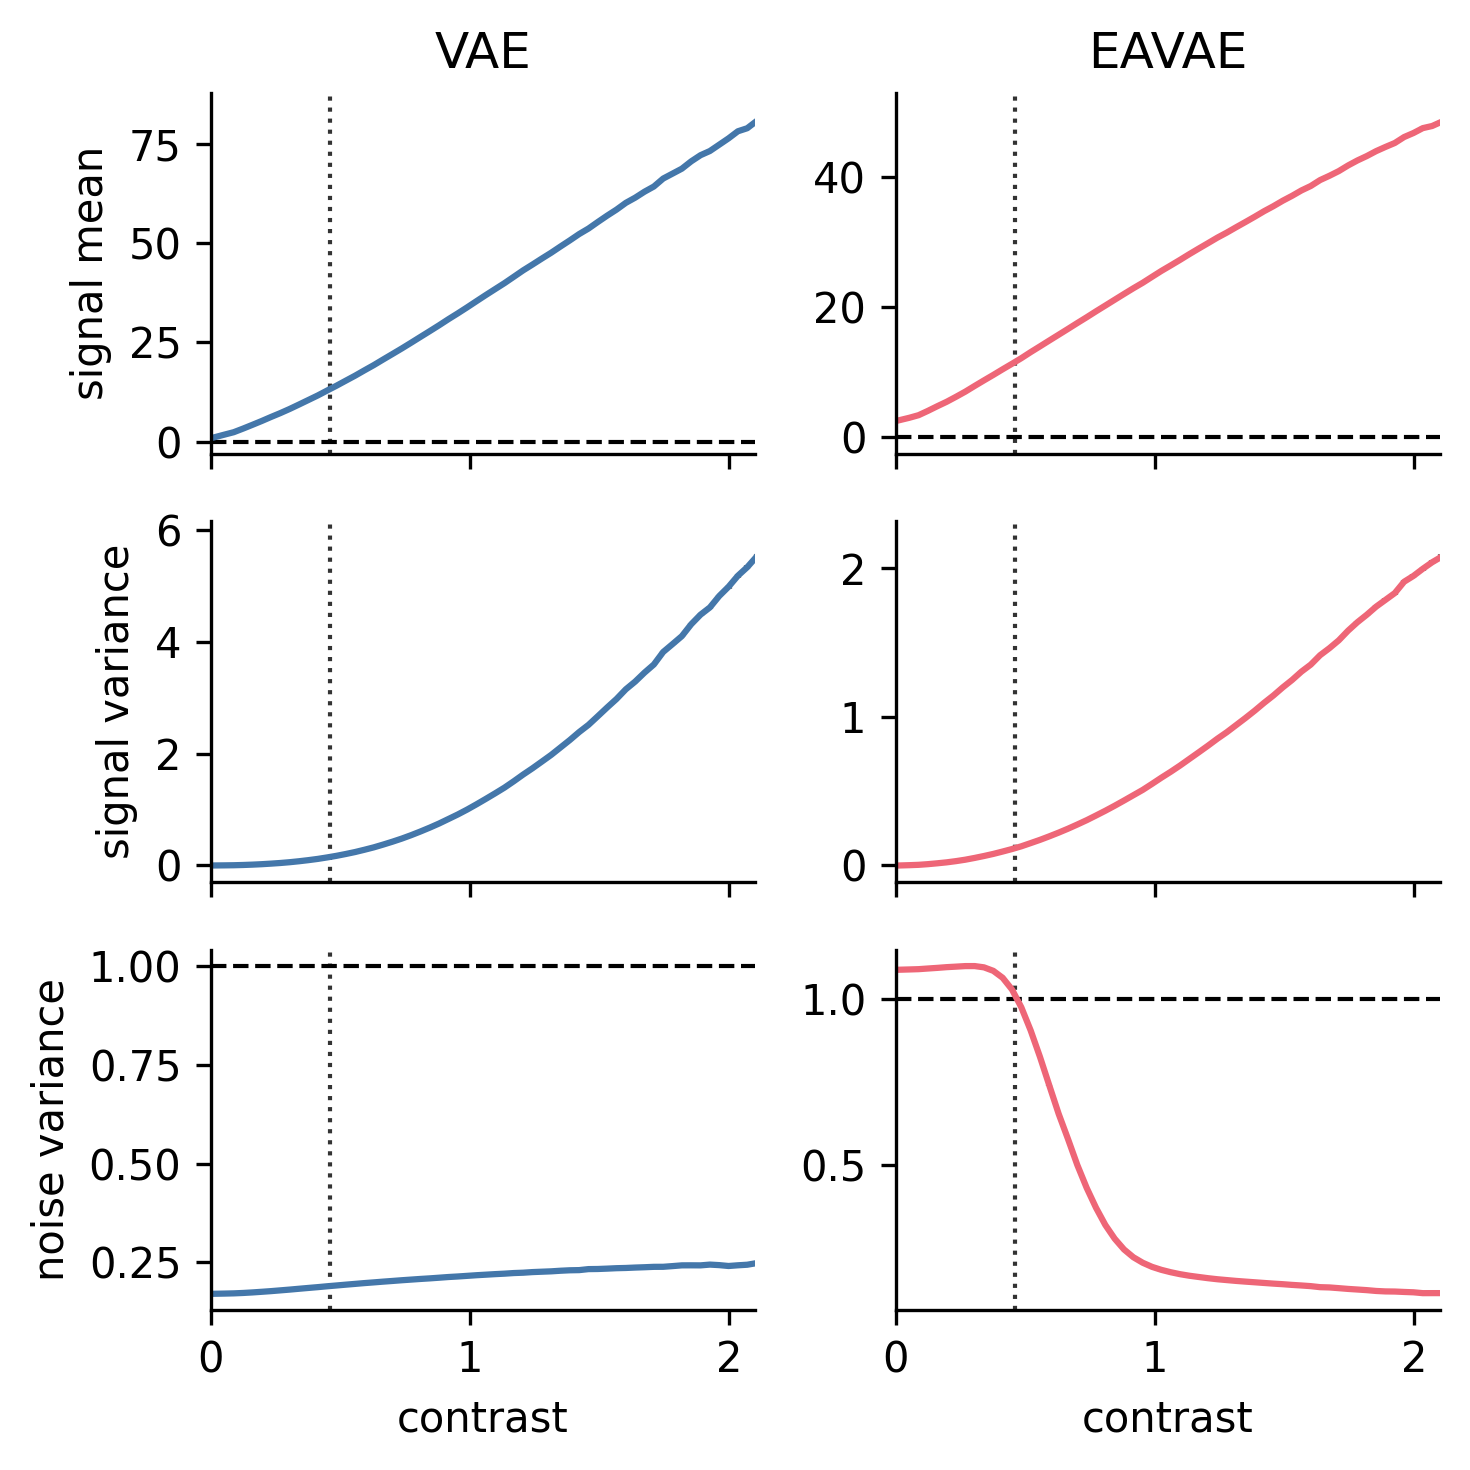

In [18]:
#VAE & EAVAE latent moments
color_vae = cmap_bright[0]
color_eavae = cmap_bright[4]

fig, ax = plt.subplots(3, 2, figsize=(5,5))
#fig.subplots_adjust
ax[0,0].set_title("VAE")
ax[0,1].set_title("EAVAE")
ax[0,0].errorbar(x=contrast_rounds_test_vae[:-40],y=binned_signal_mean_test_vae[:-40],yerr=binned_signal_mean_error_test_vae[:-40],ms=2,fmt='-',ecolor='gray',color=color_vae)#,label='test imgs')
ax[1,0].errorbar(x=contrast_rounds_test_vae[:-40],y=binned_signal_var_test_vae[:-40],yerr=binned_signal_var_error_test_vae[:-40],ms=2,fmt='-',ecolor='gray',color=color_vae)#,label='test imgs')
ax[2,0].errorbar(x=contrast_rounds_test_vae[:-40],y=binned_noise_var_test_vae[:-40],yerr=binned_noise_var_error_test_vae[:-40],ms=2,fmt='-',ecolor='gray',color=color_vae,zorder=1)#,label='VAE')#,label='test imgs')
ax[0,1].errorbar(x=contrast_rounds_test_eavae[:-40],y=binned_signal_mean_test_eavae[:-40],yerr=binned_signal_mean_error_test_eavae[:-40],ms=2,fmt='-',ecolor='gray',color=color_eavae)#,label='test imgs')
ax[1,1].errorbar(x=contrast_rounds_test_eavae[:-40],y=binned_signal_var_test_eavae[:-40],yerr=binned_signal_var_error_test_eavae[:-40],ms=2,fmt='-',ecolor='gray',color=color_eavae)#,label='test imgs')
ax[2,1].errorbar(x=contrast_rounds_test_eavae[:-40],y=binned_noise_var_test_eavae[:-40],yerr=binned_noise_var_error_test_eavae[:-40],ms=2,fmt='',ecolor='gray',color=color_eavae,zorder=1)
ax[0,0].set_ylabel('signal mean')
ax[1,0].set_ylabel('signal variance')
ax[2,0].set_ylabel('noise variance')
ax[2,0].set_xlabel('contrast')
ax[2,1].set_xlabel('contrast')
for i in range(3):
    ax[i,0].set_xlim(0,2.1)
    ax[i,1].set_xlim(0,2.1)
for i in range(2):
    ax[i,0].set_xticks([0,1,2],['','',''])
    ax[i,1].set_xticks([0,1,2], ['','',''])
ax[2,0].set_xticks([0,1,2])
ax[2,1].set_xticks([0,1,2])

for j in range(2):
    ax[0,j].axhline(0,color='black',ls='--',zorder= 0,lw=1)
    ax[2,j].axhline(1,color='black',ls='--',zorder= 0,lw=1,label='prior')

for a in ax.flat:
    a.spines[['right', 'top']].set_visible(False)
    a.axvline(x=noise_level,color='black',ls='dotted',zorder= 0,lw=1, alpha=0.8)

fig.tight_layout()
#plt.savefig(figures_path+"vae_eavae_moments.svg", format="svg", dpi=300)
#plt.savefig(figures_path+"vae_eavae_moments.pdf", dpi=300)

### EA-VAE's scaling variable $s$ posterior mean

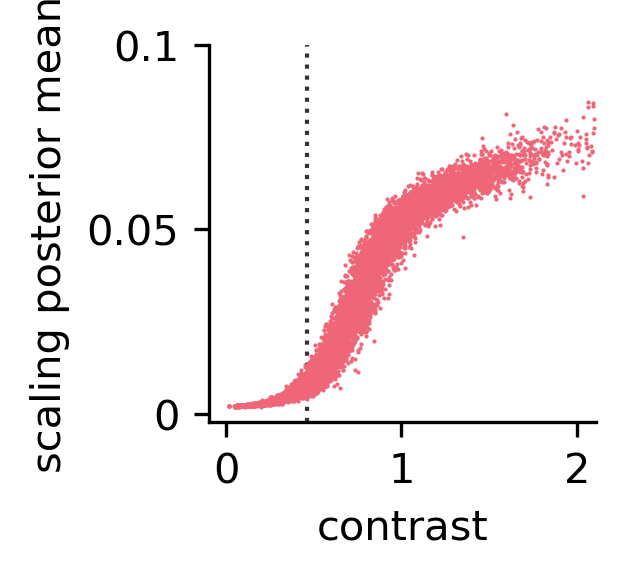

In [16]:
#@title Inferred latent scaling variable
color_vae = cmap_bright[0]
color_eavae = cmap_bright[4]

plt.figure(figsize=(5/3,5/3),dpi=300)
plt.scatter(x=nat_contrast[nat_contrast<2.1][:10000], y=test_zmu_eavae[nat_contrast<2.1][:10000], s=1, linewidths=0, color=color_eavae, zorder=2)
plt.axvline(noise_level,color='black',ls='dotted',zorder=0,lw=1, alpha=0.8)
plt.xlabel(r'contrast')
plt.ylabel(r'scaling posterior mean')
plt.xlim(-0.1,2.11)
plt.xticks([0,1,2])
plt.yticks([0,0.05,.1],[0,0.05,.1])
plt.gca().spines[['right', 'top']].set_visible(False)

#plt.savefig(figures_path+"eavae_scaling_variable_crop.svg", format="svg", dpi=300, bbox_inches='tight')

### In-distribution vs out-of-distribution reconstructions and latent uncertainty

/tmp/ipykernel_11041/8146236.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


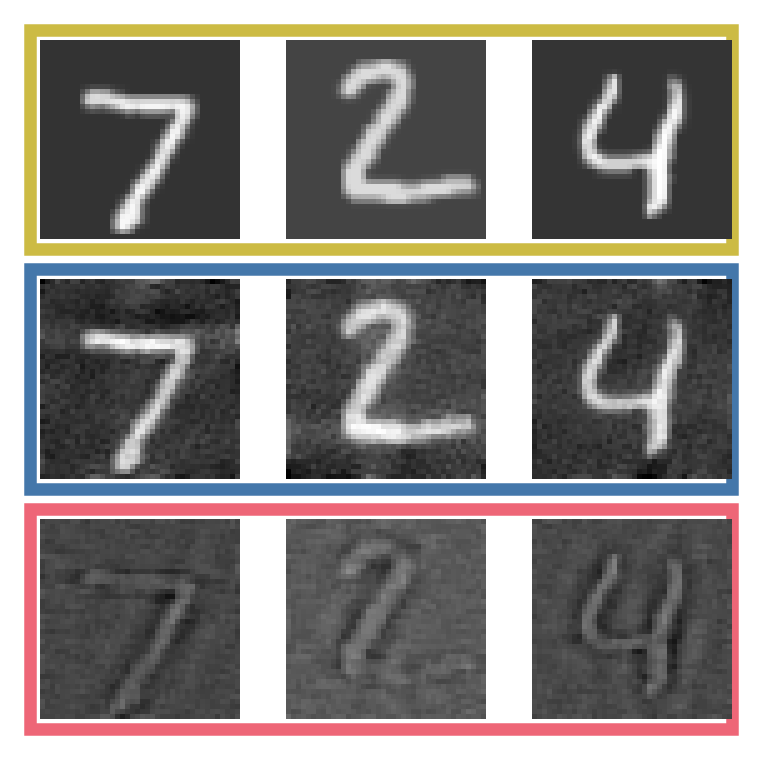

In [17]:
#OOD MNIST reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    vminn = np.array([num_x_ori[i].min(),num_x_vae[i].min(),num_x_eavae[i].min()]).min()
    vmaxx = np.array([num_x_ori[i].max(),num_x_vae[i].max(),num_x_eavae[i].max()]).max()
    ax[0, i].imshow(num_x_ori[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(num_x_vae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(num_x_eavae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")
plt.tight_layout()
#plt.savefig(figures_path+"mnist_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_11041/3431725453.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


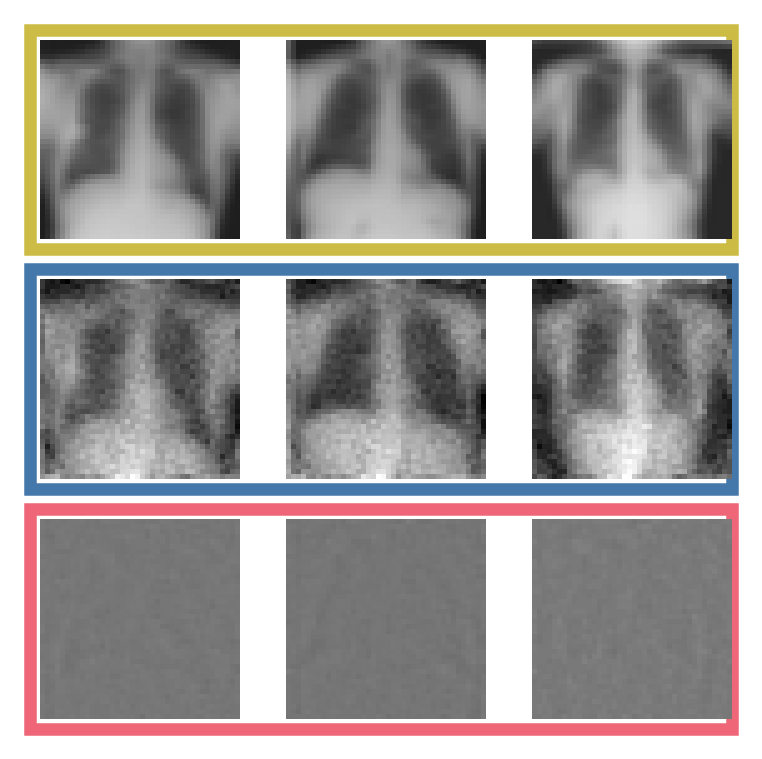

In [18]:
#OOD ChestMNIST reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    vminn = np.array([med_x_ori[i].min(),med_x_vae[i].min(),med_x_eavae[i].min()]).min()
    vmaxx = np.array([med_x_ori[i].max(),med_x_vae[i].max(),med_x_eavae[i].max()]).max()
    ax[0, i].imshow(med_x_ori[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(med_x_vae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(med_x_eavae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

#plt.savefig(figures_path+"chest_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_11041/2641445712.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


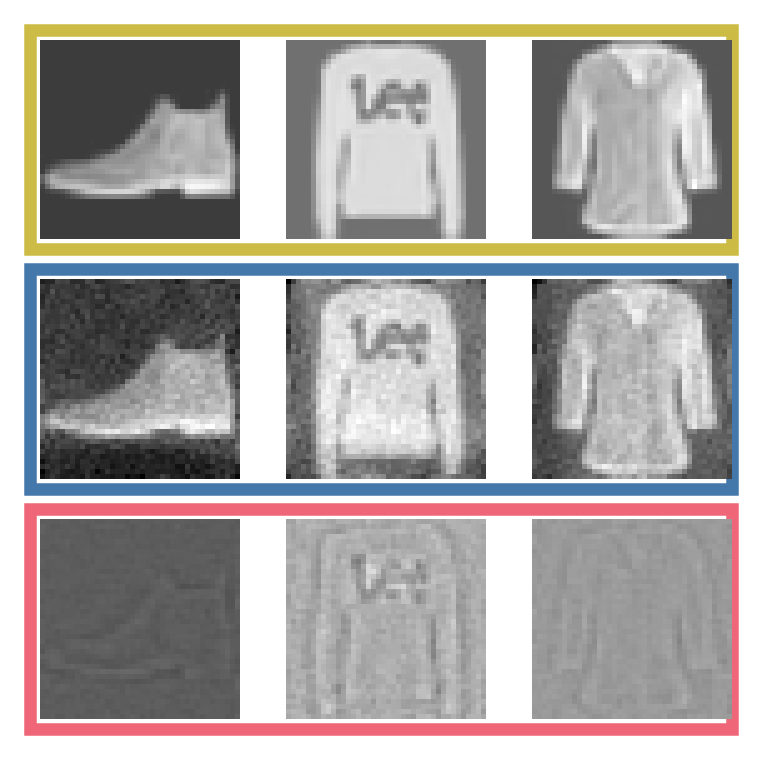

In [19]:
#OOD FashionMNIST reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    vminn = np.array([fash_x_ori[i].min(),fash_x_vae[i].min(),fash_x_eavae[i].min()]).min()
    vmaxx = np.array([fash_x_ori[i].max(),fash_x_vae[i].max(),fash_x_eavae[i].max()]).max()
    ax[0, i].imshow(fash_x_ori[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(fash_x_vae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(fash_x_eavae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

#plt.savefig(figures_path+"fash_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_11041/1051351711.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


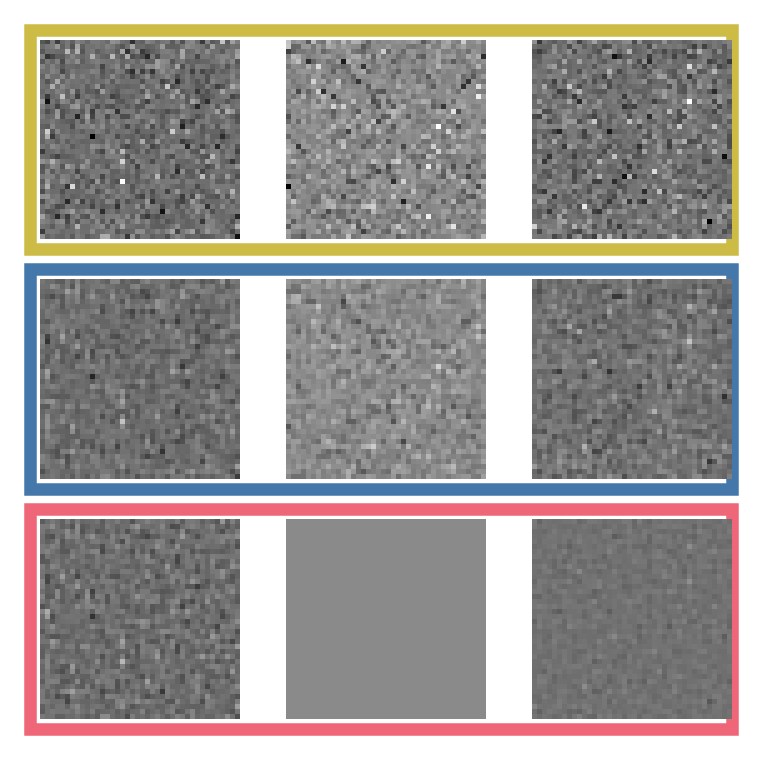

In [20]:
#title OOD Shuffled pixels reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[3], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    vminn = np.array([shuff_x_ori[i].min(),shuff_x_vae[i].min(),shuff_x_eavae[i].min()]).min()
    vmaxx = np.array([shuff_x_ori[i].max(),shuff_x_vae[i].max(),shuff_x_eavae[i].max()]).max()
    ax[0, i].imshow(shuff_x_ori[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(shuff_x_vae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(shuff_x_eavae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

#plt.savefig(figures_path+"shuff_recs.svg", format="svg", dpi=300)

/tmp/ipykernel_11041/2513612516.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


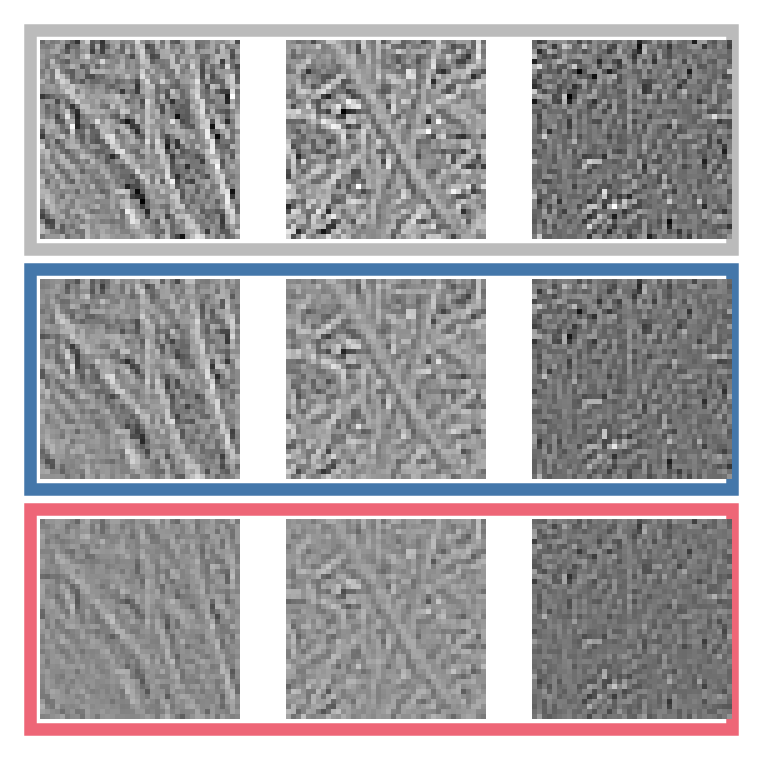

In [21]:
#ID natural reconstructions
fig, ax = plt.subplots(3, 3, figsize=(3,3))
rect_ori = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[0,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[5], facecolor="none", linewidth=3)
rect_eavae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[2,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[4], facecolor="none", linewidth=3)
rect_vae = plt.Rectangle((-2.5,-0.05), width=140.5, height=1.1,
                     transform=ax[1,0].get_xaxis_transform(), clip_on=False,
                     edgecolor=cmap_bright[0], facecolor="none", linewidth=3)
ax[0,0].add_patch(rect_ori)
ax[1,0].add_patch(rect_vae)
ax[2,0].add_patch(rect_eavae)
for i in range(3):
    vminn = np.array([x_ori[i].min(),x_vae[i].min(),x_eavae[i].min()]).min()
    vmaxx = np.array([x_ori[i].max(),x_vae[i].max(),x_eavae[i].max()]).max()
    ax[0, i].imshow(x_ori[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[0, i].axis("off")
    ax[0, i].set_aspect("equal")
    ax[1, i].imshow(x_vae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[1, i].axis("off")
    ax[1, i].set_aspect("equal")
    ax[2, i].imshow(x_eavae[i].reshape(40,40).squeeze(), aspect="auto", cmap='gray',vmin=vminn,vmax=vmaxx)
    ax[2, i].axis("off")
    ax[2, i].set_aspect("equal")

plt.tight_layout()

#plt.savefig(figures_path+"nat_recs.svg", format="svg", dpi=300)

<ipython-input-29-a3aecf852711>:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.0}` instead.

  sns.pointplot(data=uncertainty_df, x="data-set", y="uncertainty", hue="model",estimator=np.median,


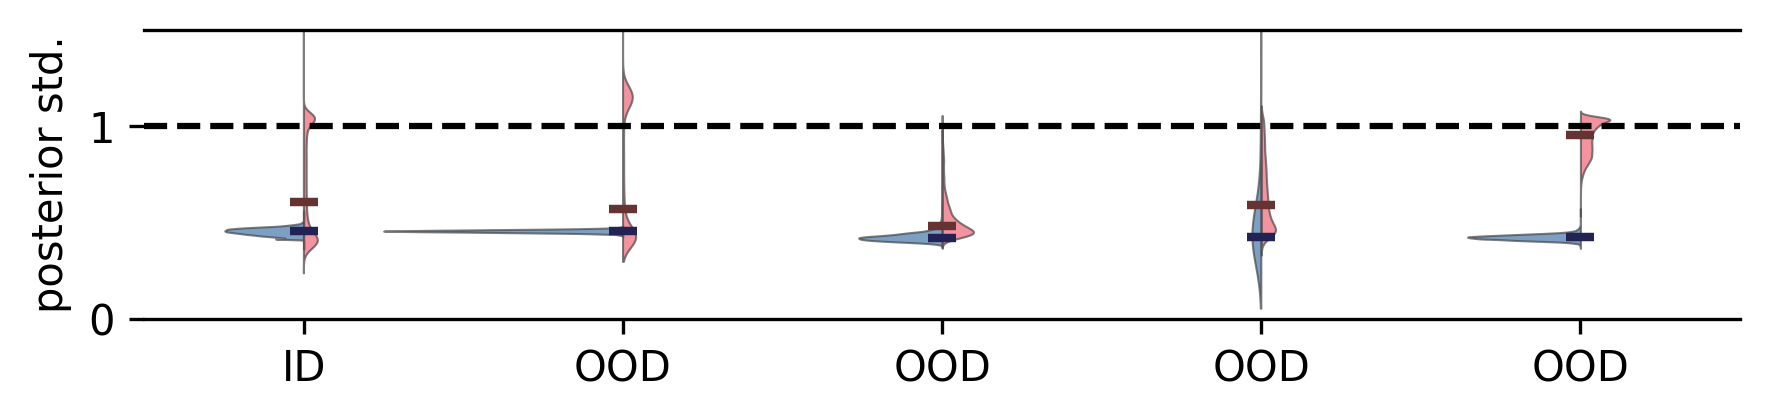

In [29]:
#Latent noise std. ID vs OOD. VAE vs EAVAE
plt.figure(figsize=(6,1.5))
ax=sns.violinplot(data=uncertainty_df, x="data-set", y="uncertainty", hue="model",
                  split=True, inner=None,linewidth=.5,palette=cmap_bright_vae_eavae,saturation=1.,gridsize=4000,
                  density_norm='area',common_norm=True,width=0.8)

plt.setp(ax.collections, alpha=.7)
plt.axhline(1,color='black',ls='--',label=r'prior')
sns.pointplot(data=uncertainty_df, x="data-set", y="uncertainty", hue="model",estimator=np.median,
              linestyles = '',markers='_',palette=cmap_dark_vae_eavae,errwidth=0.0)
plt.xlim(-.5,4.5)
plt.xticks([0,1,2,3,4],['','','','',''])
plt.xticks([0,1,2,3,4],['ID','OOD', 'OOD','OOD','OOD'])
plt.yticks([0,1])
plt.ylim(0.0,1.5)
#plt.yscale('log')
plt.ylabel('posterior std.')
plt.xlabel('')
plt.legend('',frameon=False)
plt.gca().spines[['right', 'left']].set_visible(False)
plt.tight_layout()

#plt.savefig(figures_path+"noise_ood.svg", format="svg", dpi=300)

/home/jcatoni/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2), (0.4, 0.2, 0.2)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


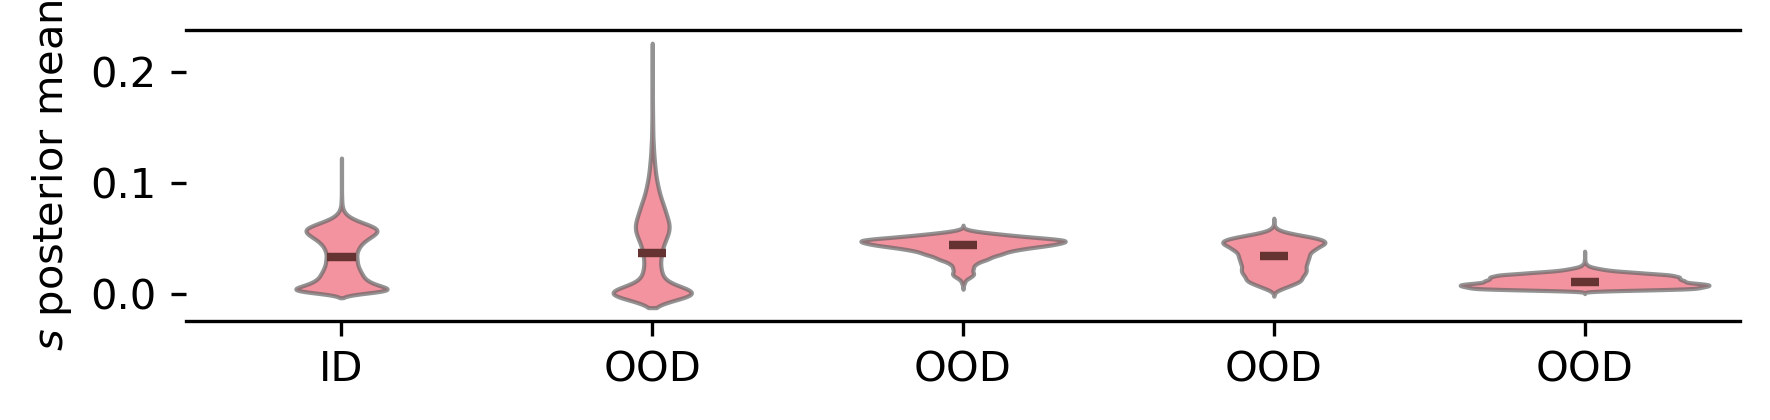

In [24]:
#Latent scaling variable ID vs OOD
plt.figure(figsize=(6,1.5))
ax=sns.violinplot(data=zmu_eavae_df[zmu_eavae_df['z_mu']<100000], x="data-set", y="z_mu",
                  inner=None,linewidth=1,color=cmap_bright_vae_eavae[1],saturation=1.,gridsize=6000,
                  density_norm='width')

plt.setp(ax.collections, alpha=.7)
#plt.axhline(1,color='black',ls='--',label=r'prior')
sns.pointplot(data=zmu_eavae_df[zmu_eavae_df['z_mu']<100000], x="data-set", y="z_mu",estimator=np.median,
              linestyles = '',markers='_',color=cmap_dark_vae_eavae[1],errwidth=0.0)
plt.xlim(-.5,4.5)
plt.xticks([0,1,2,3,4],['','','','',''])
plt.xticks([0,1,2,3,4],['ID','OOD', 'OOD','OOD','OOD'])
#plt.yticks([0,4,8])
#plt.ylim(0,10)
plt.ylabel(r'$s$ posterior mean')
plt.xlabel('')
plt.legend('',frameon=False)
plt.gca().spines[['right', 'left']].set_visible(False)
plt.tight_layout()
#plt.savefig(figures_path+"scaling_ood.svg", format="svg", dpi=300)